# Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score

# Import data


In [2]:
rice = pd.read_excel('rice.xlsx')

le = LabelEncoder()
rice['Class'] = le.fit_transform(rice['Class'])  # Cammeo -> 0 (or 1)
print(le.classes_)

X = rice.drop("Class", axis=1)
y = rice["Class"]
rice.head(5)

['Cammeo' 'Osmancik']


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,0
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,0
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,0
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,0
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,0


# Choosing best parameters for SVM

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=13, stratify=y)

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=23)

# Try with logarithmic scale first (0.01, 0.1, 1, 10, 100)
# Then localize around 10: (8,9,10,11,12)
param_grid = {
    'C': [11.5,11.7,11.9,12.1,12.2,12.3,12.5],
    'kernel': ['linear', 'rbf','sigmoid','poly'],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(SVC(), param_grid, scoring='accuracy', cv=skf)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)
best_params = grid.best_params_

final_model = SVC(
    C=grid.best_params_["C"],
    kernel=grid.best_params_["kernel"],
    gamma=grid.best_params_["gamma"]
)

Best parameters: {'C': 11.5, 'gamma': 'auto', 'kernel': 'rbf'}
Best CV accuracy: 0.9320933994823124


# Training SVM

In [4]:
final_model.fit(X_train, y_train)

SVC(C=11.5, gamma='auto')

# Testing and Showing result

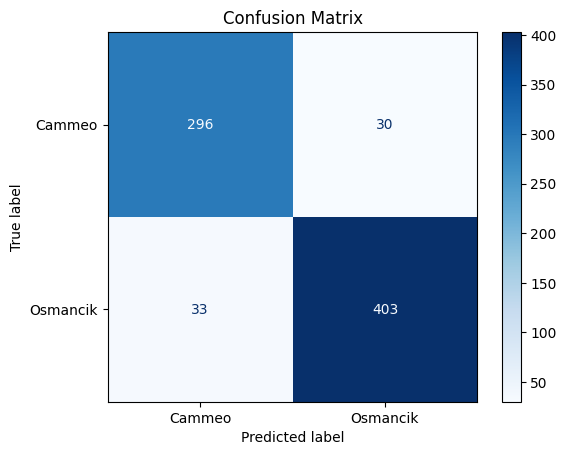

Accuracy: 0.9173
Sensitivity (Recall): 0.9243
Specificity: 0.9080
Precision: 0.9307
F1-Score: 0.9275
NPV: 0.8997
FPR: 0.0920
FDR: 0.0693
FNR: 0.0757


In [ ]:
y_pred = final_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
# Compute all metrics
accuracy  = (tp + tn) / (tp + tn + fp + fn)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)
npv = tn / (tn + fn)
fpr = fp / (fp + tn)
fdr = fp / (tp + fp)
fnr = fn / (fn + tp)

# Display
print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1_score:.4f}")
print(f"NPV: {npv:.4f}")
print(f"FPR: {fpr:.4f}")
print(f"FDR: {fdr:.4f}")
print(f"FNR: {fnr:.4f}")
